<a href="https://colab.research.google.com/github/JUNGEUNAH/HG_MLDL/blob/main/02_1_%ED%9B%88%EB%A0%A8_%EC%84%B8%ED%8A%B8%EC%99%80_%ED%85%8C%EC%8A%A4%ED%8A%B8_%EC%84%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지도 학습과 비지도 학습

머신러닝 알고리즘
- 지도 학습 - 훈련하기 위한 데이터(=input)와 정답(=target)이 필요<br/>
　　　　　정답(=target)이 있어 알고리즘이 정답(=target)을 맞히는 것을 학습

- 비지도 학습 - target 없이 input 데이터만 사용<br/>
　　　　　　정답을 사용하지 않으므로 무언가를 맞출 수 없음<br/>
　　　　　　대신 데이터를 잘 파악하거나 변형하는데 도움을 줌

- 강화 학습 - 정답(=target)이 아니라 알고리즘이 행동한 결과로 얻은 보상을 사용해 학습
<br/>

지도 학습에서 데이터는** input(입력)과 target(타깃)을 합쳐서 훈련 데이터**라고 부르고, <br/>
input(입력)으로 사용된 길이와 무게를 feature(특성)이라고 한다.

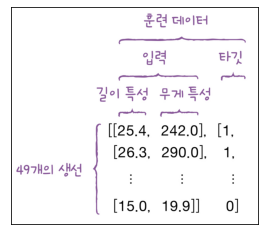

In [129]:
from PIL import Image
import matplotlib.pyplot as plt

frm = plt.gca()

img = Image.open('/content/drive/MyDrive/Colab Notebooks/혼자 공부하는 머신러닝+딥러닝/그림/3.jpg')
frm.imshow(img)

frm.axes.get_xaxis().set_visible(False)
frm.axes.get_yaxis().set_visible(False)

# 훈련 세트와 테스트 세트 
훈련에 사용한 데이터로 모델을 평가하는 것은 적절하지 않음<br/>
훈련할 때 사용하지 않은 데이터로 평가해야하기 때문에<br/>
평가를 위해 다른 데이터를 준비하거나, 훈련 데이터에서 일부를 떼어 내어 테스트 세트로 사용

훈련에 사용하는 데이터를 **훈련 세트=train set**<br/>
평가에 사용하는 데이터를 **테스트 세트=test set**


### 생선 데이터 준비하기

In [130]:
# 생선의 길이
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# 생선의 무게
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [131]:
# 두 리스트를 순회하면서 각 생선의 길이와 무게를 하나의 리스트로 담은 2차원 리스트 만들기 
fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)]
fish_target = [1]*35 + [0]*14

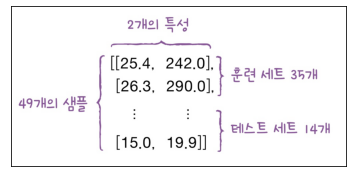

In [132]:
from PIL import Image
import matplotlib.pyplot as plt

frm = plt.gca()

img = Image.open('/content/drive/MyDrive/Colab Notebooks/혼자 공부하는 머신러닝+딥러닝/그림/4.jpg')
frm.imshow(img)

frm.axes.get_xaxis().set_visible(False)
frm.axes.get_yaxis().set_visible(False)

# 이때, 하나의 생선 데이터를 샘플
# 사용하는 feature는 길이와 무게 2개
# 처음 35개 샘플을 train set, 나머지 14개 샘플을 test set으로 사용할 것

### 모델 객체 만들기

In [133]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

### 훈련 세트와 테스트 세트 나누기

배열(ex. 리스트)의 요소를 선택할 때는 배열의 위치(=인덱스)를 지정

리스트는 **'슬라이싱'**이라는 연산자 제공 <br/>
:을 가운데 두고 인덱스의 범위를 지정하여 원소를 여러개 선택 가능 <br/>
슬라이싱을 사용할 때는 **마지막 인덱스의 원소는 포함되지 않는다**




In [134]:
print(fish_data[4])     # fish_data의 다섯번재 샘플을 출력

[29.0, 430.0]


In [135]:
print(fish_data[0:5])   # 슬라이싱 연산을 사용하면 인덱스의 범위를 지정하여 원소를 여러 개 선택 가능

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [136]:
print(fish_data[:5])    # 처음부터 시작되는 슬라이싱의 경우 0을 생략하고 쓸 수 있음

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [137]:
print(fish_data[44:])   # 마지막 원소까지 포함할 경우, 두번째 인덱스 생략 가능

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [138]:
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]

# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]

# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]

# 테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

### 모델 훈련 및 성능 평가

In [140]:
kn = kn.fit(train_input, train_target)    # train data로 모델(kn)을 훈련시킨 후 객체 kn에 담아서

kn.score(test_input, test_target)         # 모델 kn이 새로운 test data를 잘 분류하는지 평가
                                          # 뮨제 발생: 정확도 0

0.0

# 샘플링 편향

훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않으면 샘플링이 한쪽으로 치우쳤다는 의미 <br/>
특정 종류의 샘플이 과도하게 많은 샘플링 편향을 가지고 있다면 제대로 된 지도 학습 모델을 만들 수 없음 <br/>

ex) 훈련세트에 빙어가 하나도 들어 있지 않음 <br/>
빙어 없이 모델을 훈련하면, 빙어를 올바르게 분류할 수 없음

→ ① 데이터를 섞고 train set과 test set을 나누던지 <br/>
　 ② 골고루(=무작위로) 샘플을 뽑아서 train set과 test set을 만드는 작업을 <br/>
　간편하게 하기위해 **넘파이** 라이브러리 사용



---



# 넘파이
파이썬의 대표적인 배열(array) 라이브러리<br/>
고차원의 배열을 손쉽게 만들고 조작할 수 잇는 간편한 도구를 많이 제공<br/>
<br/>
사이킷런 모델의 입력과 출력은 모두 넘파일 배열<br/>
(ex. predict() 메서드가 반환하는 값도 단순한 파이썬 리스트가 아니라 넘파이 배열)<br/>
많은 파이썬 과학 라이브러리에서 사용하는 표준 데이터 <br/>
<br/>
- 배열(array)에서 차원은 좌표계의 축
- 1차원 array는 선,　2차원 array는 면,　3차원 array는 공간<br/>
<br/>
- 배열(arrary)객체는 배열의 크기를 알려주는 **shape** 속성 제공: (샘플 수, 특성 수) 출력 가능
<br/>
- 슬라이싱 이외에 **배열 인덱싱** 기능 제공: 여러개의 인덱스로 여러개의 원소를 한번에 선택 가능

### 생선 데이터 준비하기
### 생선 데이터(2차원 리스트)를 2차원 넘파이 배열로 변환하기
 

In [141]:
# 파이썬 리스트를 넘파이 배열로 바꾸기

import numpy as np

input_arr=np.array(fish_data) # 넘파이 array()함수에 파이썬 리스트 전달해주면 됨
target_arr=np.array(fish_target)

In [142]:
 # 넘파이는 배열의 차원을 구분하기 쉽도록 행과 열을 가지런히 출력함
print(input_arr)   # 49개의 행(샘플), 2개의 열(특성)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [143]:
# shpae 속성은 배열의 크기=(샘플 수, 특성 수)를 알려줌
print(input_arr.shape)  

(49, 2)


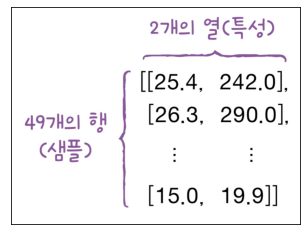

In [98]:
frm = plt.gca()

img = Image.open('/content/drive/MyDrive/Colab Notebooks/혼자 공부하는 머신러닝+딥러닝/그림/5.jpg')
frm.imshow(img)

frm.axes.get_xaxis().set_visible(False)
frm.axes.get_yaxis().set_visible(False)

### 훈련 세트와 테스트 세트 만들기
② 무작위로 샘플을 뽑아서 train set과 test set을 만드는 방법 선택<br/>
단, input_arr와 target_arr에서 같은 위치는 함께 선택되어야 함 

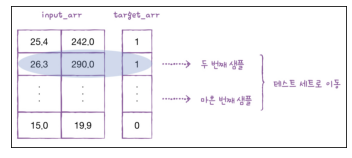

In [99]:
frm = plt.gca()

img = Image.open('/content/drive/MyDrive/Colab Notebooks/혼자 공부하는 머신러닝+딥러닝/그림/6.jpg')
frm.imshow(img)

frm.axes.get_xaxis().set_visible(False)
frm.axes.get_yaxis().set_visible(False)

하지만 항상 인덱스 값을 기억해서 훈련 세트와 테스트 세트로 나눌 수 없으니,<br/>
아예 인덱스를 섞은 다음 샘플을 선택하면 무작위로 훈련 세트를 나누는 셈이 됨.<br/>


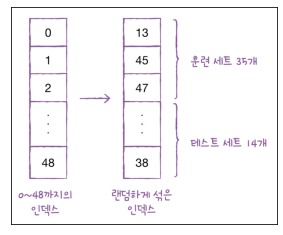

In [100]:
frm = plt.gca()

img = Image.open('/content/drive/MyDrive/Colab Notebooks/혼자 공부하는 머신러닝+딥러닝/그림/7.jpg')
frm.imshow(img)

frm.axes.get_xaxis().set_visible(False)
frm.axes.get_yaxis().set_visible(False)

넘파이 arange() 함수를 사용하면 0에서부터 48까지 1씩 증가하는 인덱스를 간단하게 만들 수 있음<br/>
그 다음 인덱스를 랜덤하게 섞음<br/>
<br/>
넘파이에서 무작위 결과를 만드는 함수들은 실행할 때마다 다른 결과를 만들.<br/>
-> 일정한 결과를 얻으려면 초기에 **random seed**를 지정하면 됨<br/>
(책과 동일한 결과를 얻기 위해 random seed를 42로 지정)

In [144]:
np.random.seed(42)  # 일정한 결과를 얻기 위해 random seed값 지정 (책과 동일한 결과를 위해 42로 지정)

# 0부터 48까지 1씩 증가하는 인덱스 만들기 
index = np.arange(49)     # arange() 함수에 정수 N을 전달하면 0에서부터 N-1까지 증가하는 배열을 만듦

# 인덱스를 랜덤하게 섞기
np.random.shuffle(index)   # shuffle()함수는 주어진 배열을 무작위로 섞음

In [145]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [146]:
# 넘파이의 배열 인덱싱으로 여러개의 인덱스로 여러 개의 원소 한번에 선택 가능

print(input_arr[[1,3]])   # input_arr의 두 번째 샘플과 네 번째 샘플 선택하여 출력

[[ 26.3 290. ]
 [ 29.  363. ]]


훈련 세트

In [147]:
# 넘파이의 배열을 인덱스로 전달 가능 

train_input = input_arr[index[:35]]   # input_arr의 0번 인덱스부터 34번 인덱스까지를 train_input으로 전달
train_target = target_arr[index[:35]] 

In [148]:
# 아까 shuffle()로 랜덤하게 섞어서 만든 index의 첫번째 값은 13이었음 
# index[0]=13이니까 input_arr[ index[0] ] ( =input_arr[ 13 ] ) == train_input[0]

print(input_arr[13],train_input[0]) #train_input의 첫 번째 원소에는 input_arr의 열 네번째 원소가 들어 있는 것

[ 32. 340.] [ 32. 340.]


테스트 세트

In [153]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

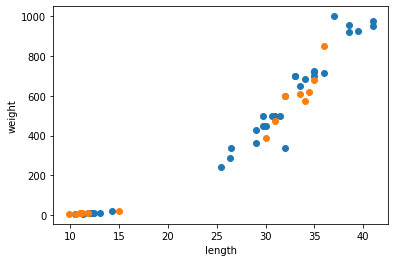

In [154]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])   # 훈련 세트 - 파랑 (도미와 빙어가 모두 있음 있음)
plt.scatter(test_input[:,0],test_input[:,1])     # 테스트 세트 - 주황 (도미와 빙어가 모두 있음)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 두번째 머신러닝 프로그램
fit() 메서드는 실행할 때마다 KNeighborsClassifier 클래스의 객체(여기서는 kn)는 이전에 학습한 모든 것을 잃어버림.<br/>
이전 모델을 그대로 두고 싶다면, KNeighborsClassifier 클래스의 객체를 새로 만들어야 함.<br/>

(여기서는 kn 객체 그대로 사용할 것)

In [155]:
# 인덱스를 섞어 만든 train_input과 train_target으로 모델 훈련시키기

kn = kn.fit(train_input, train_target) 

In [156]:
# test_input과 test_target으로 모델 성능 테스트하기 

kn.score(test_input, test_target)

1.0

In [157]:
kn.predict(test_input)    # predict() 메서드가 반환하는 값은 넘파이 배열(단순한 파이썬 리스트X)
                          # 사이킷런 모델의 입력과 출력은 모두 넘파일 배열
                          # 많은 파이썬 과학 라이브러리에서 사용하는 표준 데이터 

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [158]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])